<a href="https://colab.research.google.com/github/heminminmin/AI_Papering_Defects_Project/blob/main/S%26P500%20%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime
import FinanceDataReader as fdr

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=365*5) #5년치 데이터

sp500= fdr.DataReader('^GSPC', start_date, end_date) #s&p500 불러오기 

sp500


#Open: 시가
#High: 고가
#Low: 저가
#Close: 종가
#Volume: 거래량
#Change: 대비
#Adj Close: 수정종가 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-19,2701.159912,2702.840088,2681.899902,2693.129883,2693.129883,3375120000
2018-04-20,2692.560059,2693.939941,2660.610107,2670.139893,2670.139893,3428260000
2018-04-23,2675.399902,2682.860107,2657.989990,2670.290039,2670.290039,3030390000
2018-04-24,2680.800049,2683.550049,2617.320068,2634.560059,2634.560059,3716020000
2018-04-25,2634.919922,2645.300049,2612.669922,2639.399902,2639.399902,3563680000
...,...,...,...,...,...,...
2023-04-10,4085.199951,4109.500000,4072.550049,4109.109863,4109.109863,3423650000
2023-04-11,4110.290039,4124.259766,4102.609863,4108.939941,4108.939941,3665830000
2023-04-12,4121.720215,4134.370117,4086.939941,4091.949951,4091.949951,3633120000


In [ ]:
sp500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-10,4085.199951,4109.500000,4072.550049,4109.109863,4109.109863,3423650000
2023-04-11,4110.290039,4124.259766,4102.609863,4108.939941,4108.939941,3665830000
2023-04-12,4121.720215,4134.370117,4086.939941,4091.949951,4091.949951,3633120000
2023-04-13,4100.040039,4150.259766,4099.399902,4146.220215,4146.220215,3596590000
2023-04-14,4140.109863,4163.189941,4113.200195,4137.640137,4137.640137,3575690000


In [ ]:
sp500.index

DatetimeIndex(['2018-04-19', '2018-04-20', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-30',
               '2018-05-01', '2018-05-02',
               ...
               '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

Text(0, 0.5, 'price')

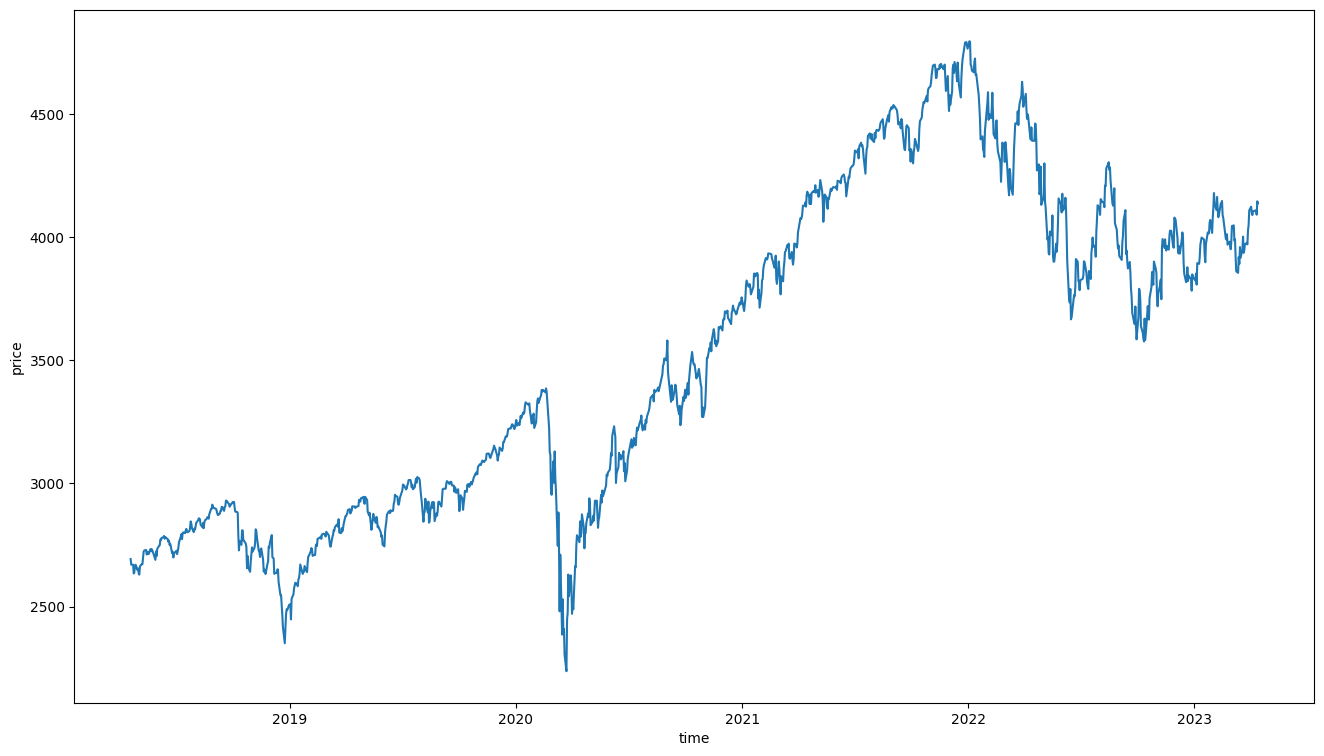

In [ ]:
#지수 종가 데이터 시각화 
#y 종가 데이터, x 날짜 데이터
plt.figure(figsize=(16,9))
sns.lineplot(y=sp500['Close'], x=sp500.index)
plt.xlabel('time')
plt.ylabel('price')

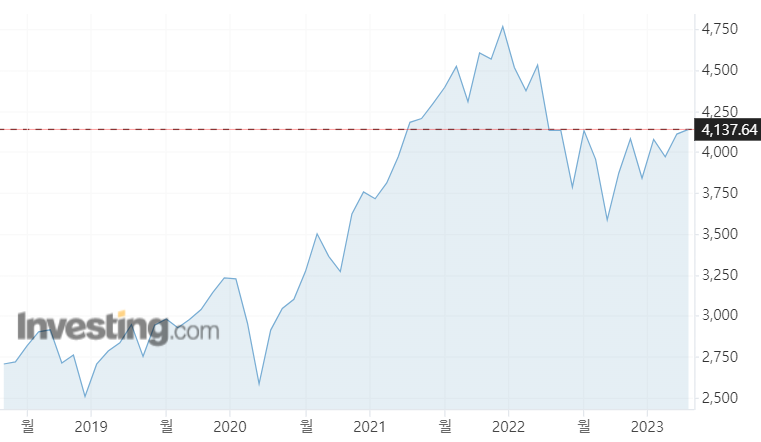

In [ ]:
#정규화 공식 대입 

#sp500=(sp500- sp500.min(axis=0))/ (sp500.max(axis=0) - sp500.min(axis=0))
#sp500

In [ ]:
from sklearn.preprocessing import MinMaxScaler 


데이터 전처리 

In [ ]:
scaler= MinMaxScaler() 
scale_cols =['Close']
scaled = scaler.fit_transform(sp500[scale_cols])
scaled

array([[0.17807794],
       [0.16909453],
       [0.1691532 ],
       ...,
       [0.72467135],
       [0.74587763],
       [0.74252494]])

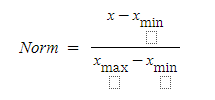

In [ ]:
df=pd.DataFrame(scaled,columns=scale_cols)

train 데이터 생성 

In [ ]:
df.head()
len(df)
df.shape


df['Close']

a=df.to_numpy()

#df-> list 로 만들어줌 
spList=[a[i][0] for i in range(len(a))]
spList

[0.178077944732554,
 0.16909453275768538,
 0.16915320278644042,
 0.15519159905395474,
 0.15708278315462998,
 0.1678441412996725,
 0.16900466694785288,
 0.16046285570551722,
 0.16310043975102406,
 0.1556252815638064,
 0.15330423026744544,
 0.166468682639779,
 0.17006750429805173,
 0.16979008477115798,
 0.17989891556443127,
 0.18977716758818697,
 0.19159413202758757,
 0.1925358128338508,
 0.18523656977987257,
 0.18953876633052014,
 0.1886282809145814,
 0.1858305224466652,
 0.19366123165225568,
 0.19031244983547158,
 0.19377065387783765,
 0.19160977739463925,
 0.18909726094176604,
 0.17680026932366788,
 0.19014445292491322,
 0.1828217420157343,
 0.19429038610184945,
 0.19907711270295447,
 0.19983123979215645,
 0.20903349660894244,
 0.20825981271323757,
 0.21164370096904417,
 0.21280422661722453,
 0.21469941789188307,
 0.21031508306652658,
 0.21299569177373678,
 0.21188982976183457,
 0.20958051278382728,
 0.20521974154820355,
 0.20706799633095407,
 0.20020634761703193,
 0.20220695433404257

In [ ]:
len(spList)

NameError: ignored

In [ ]:
lookback = 50  #50일치 sequence data 제작 
X=[]
y=[]

for i in range(len(spList)-lookback): #1257- 50개씩 
   X.append(spList[i:i+lookback]) #0~49의 날짜,,(50개씩 묶음 ) / 50~ 
   y.append(spList[i+lookback])#다음날 주가 예측을 위해 i +lookback .. 다음날 가격을 가져옴 
#y[0]- 51 번째 data 
Xn=np.array(X)
yn=np.array(y)
Xn.shape, yn.shape

Xn=Xn.reshape(1206,50,1)
Xn.shape


(1206, 50, 1)

In [ ]:
#훈련, 학습 분리  

from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test= train_test_split(Xn,yn, test_size=0.2, random_state=0 , shuffle=False)
X_train.shape , x_test.shape, y_train.shape ,y_test.shape



NameError: ignored

In [ ]:
X_train.shape[1:]

(50,)

모델생성 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization

In [ ]:
model = Sequential() #층으로 쌓겠다 순서대로 
model.add(BatchNormalization(axis=1, input_shape=X_train.shape[1:]))

model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(32, return_sequences=True, activation='relu'))
model.add(LSTM(32))

model.add(Dense(1)) #예측한 주가 



In [ ]:
model.compile(loss='mse', optimizer='rmsprop') 

In [ ]:
h = model.fit(X_train, y_train, batch_size=32, epochs=200 , validation_data= [x_test, y_test])
#0.0579 -> 0.0025

Epoch 1/200
31/31 [==============================] - 8s 98ms/step - loss: 0.0579 - val_loss: 0.0032
Epoch 2/200
31/31 [==============================] - 2s 79ms/step - loss: 0.0082 - val_loss: 0.0133
Epoch 3/200
31/31 [==============================] - 3s 104ms/step - loss: 0.0092 - val_loss: 0.0094
Epoch 4/200
31/31 [==============================] - 2s 71ms/step - loss: 0.0078 - val_loss: 0.0492
Epoch 5/200
31/31 [==============================] - 2s 72ms/step - loss: 0.0066 - val_loss: 0.0284
Epoch 6/200
31/31 [==============================] - 2s 74ms/step - loss: 0.0068 - val_loss: 0.0096
Epoch 7/200
31/31 [==============================] - 2s 72ms/step - loss: 0.0074 - val_loss: 0.0262
Epoch 8/200
31/31 [==============================] - 3s 112ms/step - loss: 0.0041 - val_loss: 0.0158
Epoch 9/200
31/31 [==============================] - 2s 72ms/step - loss: 0.0063 - val_loss: 0.0491
Epoch 10/200
31/31 [==============================] - 2s 73ms/step - loss: 0.0072 - val_loss: 0.01

8/8 [==============================] - 0s 19ms/step


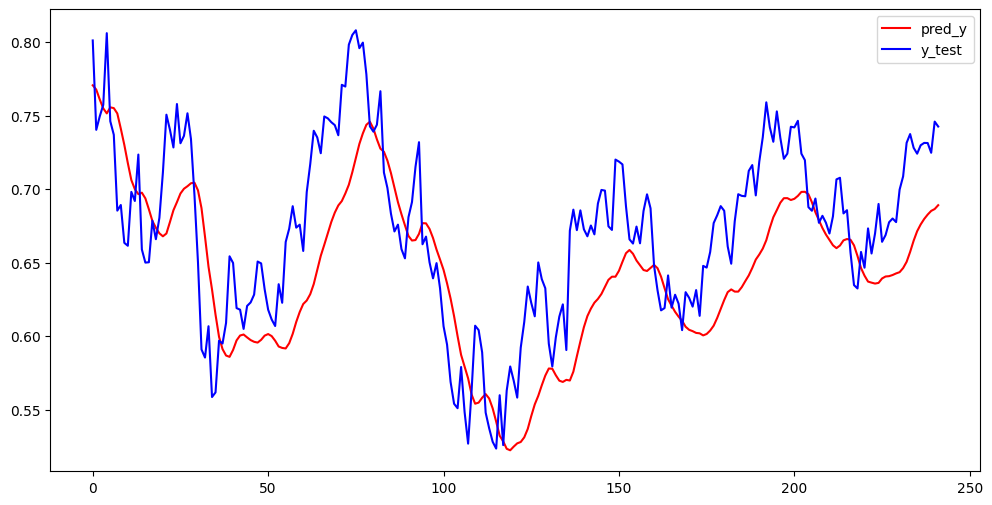

In [ ]:
pred_y = model.predict(x_test)

plt.figure(figsize=[12,6])
plt.plot(pred_y.ravel(), 'r-', label='pred_y')
plt.plot(y_test.ravel(), 'b-', label='y_test')
plt.legend()


주황색 = 예측 , 파란색 - 진짜 데이터 